### Comparing various Bismark subsetting options and how they relate to _C.virginica_ genome-wide MBD CpG coverage

##### Variables to be set by user

Re: two "work_dir" variables -
Both are needed, as one is needed by Bash and the other by Python (respectively)

In [1]:
%env work_dir = /home/sam/Downloads/20190418_cvir_mbd_coverage_analysis
work_dir = "/home/sam/Downloads/20190418_cvir_mbd_coverage_analysis"
output_plot = "20190418_cvir_mbd_cov_comparison.png"

env: work_dir=/home/sam/Downloads/20190418_cvir_mbd_coverage_analysis


##### Import necessary modules

In [2]:
import pandas
import os
import numpy
from IPython.display import display
import matplotlib.pyplot as plt

##### Make new working directory, download files and rename using wget ```--output-document``` argument

In [3]:
%%bash
mkdir ${work_dir}
cd ${work_dir}
wget \
--quiet \
--output-document avg_reads_CpG_coverage.txt \
http://gannet.fish.washington.edu/Atumefaciens/20190312_cvir_gonad_bismark/avg_reads_bismark/bismark_cytosine_coverage.txt.CpG_report.txt

wget \
--quiet \
--output-document half_avg_reads_CpG_coverage.txt \
http://gannet.fish.washington.edu/Atumefaciens/20190312_cvir_gonad_bismark/half_avg_reads_bismark/bismark_cytosine_coverage.txt.CpG_report.txt

wget \
--quiet \
--output-document half_total_reads_CpG_coverage.txt \
http://gannet.fish.washington.edu/Atumefaciens/20190312_cvir_gonad_bismark/half_total_reads_bismark/bismark_cytosine_coverage.txt.CpG_report.txt


wget \
--quiet \
--output-document total_reads_CpG_coverage.txt \
http://gannet.fish.washington.edu/Atumefaciens/20190312_cvir_gonad_bismark/total_reads_bismark/bismark_cytosine_coverage.txt.CpG_report.txt


ls -lh

wc -l *.txt

total 3.7G
-rw-rw-r-- 1 sam sam 934M Apr 17 10:42 avg_reads_CpG_coverage.txt
-rw-rw-r-- 1 sam sam 934M Apr 17 10:58 half_avg_reads_CpG_coverage.txt
-rw-rw-r-- 1 sam sam 936M Apr 17 11:07 half_total_reads_CpG_coverage.txt
-rw-rw-r-- 1 sam sam 937M Apr 17 11:21 total_reads_CpG_coverage.txt
  28917406 avg_reads_CpG_coverage.txt
  28917406 half_avg_reads_CpG_coverage.txt
  28917406 half_total_reads_CpG_coverage.txt
  28917406 total_reads_CpG_coverage.txt
 115669624 total


In [4]:
cd $work_dir

/home/sam/Downloads/20190418_cvir_mbd_coverage_analysis


#### Loop through coverage files to calculate percent sequencing coverage for each Bismark subset

In [5]:
# Variable declaration
bismark_subset_list = []
mean_seq_coverage = []
percent_seq_coverage = []
percent_5x_seq_coverage = []
percent_10x_seq_coverage = []

# Create list of coverage files in current directory
cov_files = os.listdir()

# Loop through coverage files
for file in cov_files:
    print("----------------------------------------------")
    print("----------------------------------------------")
    print (file)
    subset_name = file[:-4] # Remove file suffix (.txt)
    bismark_subset_list.append(subset_name)
    #
    #
    # Create dataframe and add column names (taken from Bismark documentation)
    dataframe = pandas.read_csv(
        file,
        sep='\t',
        header=None,
        names=["chrom", "pos", "strand", "meth", "unmeth", "C-context", "trinucleotide"])
    
    dataframe['coverage'] = dataframe['meth'] + dataframe['unmeth'] # Sum of methylated and unmethylated coverage for each position.
    
    total_CpG = len(dataframe) # Count of all CpGs in genome.
    
    
    coverage = sum(dataframe['coverage']>0) # Count of all CpG positions with sequence coverage
    coverage_5x = sum(dataframe['coverage']>=5)
    coverage_10x = sum(dataframe['coverage']>=10)
    mean_coverage = round(dataframe["coverage"].mean(), 1)
    
    display("Total coverage: " + str(coverage))
    display("5x coverage: " + str(coverage_5x))
    display("10x coverage: " + str(coverage_10x))
    display("Mean coverage: " + str(mean_coverage))
    
    no_coverage = sum(dataframe['coverage']==0) # Count of all CpG posiitions with no sequence coverage
    percent_coverage = round((coverage / total_CpG * 100.0), 1) # Rounds to 1 decimal
    percent_5x_coverage = round((coverage_5x / total_CpG * 100.0), 1) # Rounds to 1 decimal
    percent_10x_coverage = round((coverage_10x / total_CpG * 100.0), 1) # Rounds to 1 decimal
    
    mean_seq_coverage.append(mean_coverage)
    percent_seq_coverage.append(percent_coverage)
    percent_5x_seq_coverage.append(percent_5x_coverage)
    percent_10x_seq_coverage.append(percent_10x_coverage)
    
    display("No coverage: " + str(no_coverage))
    display("Percent coverage: " + str(percent_coverage))
    display("Percent 5x coverage: " + str(percent_5x_coverage))
    display("Percent 10x coverage: " + str(percent_10x_coverage))
    display(dataframe.head())

----------------------------------------------
----------------------------------------------
avg_reads_CpG_coverage.txt


'Total coverage: 4410786'

'5x coverage: 918437'

'10x coverage: 518052'

'Mean coverage: 0.7'

'No coverage: 24506620'

'Percent coverage: 15.3'

'Percent 5x coverage: 3.2'

'Percent 10x coverage: 1.8'

,chrom,pos,strand,meth,unmeth,C-context,trinucleotide,coverage
0,NC_007175.2,49,+,0,5,CG,CGC,5
1,NC_007175.2,50,-,0,0,CG,CGA,0
2,NC_007175.2,51,+,0,5,CG,CGG,5
3,NC_007175.2,52,-,0,0,CG,CGC,0
4,NC_007175.2,88,+,0,5,CG,CGT,5


----------------------------------------------
----------------------------------------------
total_reads_CpG_coverage.txt


'Total coverage: 13087284'

'5x coverage: 4263854'

'10x coverage: 2617681'

'Mean coverage: 7.3'

'No coverage: 15830122'

'Percent coverage: 45.3'

'Percent 5x coverage: 14.7'

'Percent 10x coverage: 9.1'

,chrom,pos,strand,meth,unmeth,C-context,trinucleotide,coverage
0,NC_007175.2,49,+,2,158,CG,CGC,160
1,NC_007175.2,50,-,0,15,CG,CGA,15
2,NC_007175.2,51,+,2,167,CG,CGG,169
3,NC_007175.2,52,-,0,18,CG,CGC,18
4,NC_007175.2,88,+,5,483,CG,CGT,488


----------------------------------------------
----------------------------------------------
half_total_reads_CpG_coverage.txt


'Total coverage: 9694519'

'5x coverage: 2649503'

'10x coverage: 1647876'

'Mean coverage: 3.5'

'No coverage: 19222887'

'Percent coverage: 33.5'

'Percent 5x coverage: 9.2'

'Percent 10x coverage: 5.7'

,chrom,pos,strand,meth,unmeth,C-context,trinucleotide,coverage
0,NC_007175.2,49,+,2,34,CG,CGC,36
1,NC_007175.2,50,-,0,4,CG,CGA,4
2,NC_007175.2,51,+,1,35,CG,CGG,36
3,NC_007175.2,52,-,0,5,CG,CGC,5
4,NC_007175.2,88,+,0,96,CG,CGT,96


----------------------------------------------
----------------------------------------------
half_avg_reads_CpG_coverage.txt


'Total coverage: 3227641'

'5x coverage: 678974'

'10x coverage: 357365'

'Mean coverage: 0.5'

'No coverage: 25689765'

'Percent coverage: 11.2'

'Percent 5x coverage: 2.3'

'Percent 10x coverage: 1.2'

,chrom,pos,strand,meth,unmeth,C-context,trinucleotide,coverage
0,NC_007175.2,49,+,0,4,CG,CGC,4
1,NC_007175.2,50,-,0,0,CG,CGA,0
2,NC_007175.2,51,+,0,4,CG,CGG,4
3,NC_007175.2,52,-,0,0,CG,CGC,0
4,NC_007175.2,88,+,0,5,CG,CGT,5


#### Create new dataframe

In [6]:
coverage_dataframe = pandas.DataFrame(
    {
        'Bismark Subset': bismark_subset_list,
        'Mean Coverage': mean_seq_coverage,
        'Percent Coverage': percent_seq_coverage,
        'Percent 5x Coverage': percent_5x_seq_coverage,
        'Percent 10x Coverage': percent_10x_seq_coverage,
        
    })

coverage_dataframe

,Bismark Subset,Mean Coverage,Percent Coverage,Percent 5x Coverage,Percent 10x Coverage
0,avg_reads_CpG_coverage,0.7,15.3,3.2,1.8
1,total_reads_CpG_coverage,7.3,45.3,14.7,9.1
2,half_total_reads_CpG_coverage,3.5,33.5,9.2,5.7
3,half_avg_reads_CpG_coverage,0.5,11.2,2.3,1.2


#### Create line plot overlayed on bar chart, showing percent sequencing coverage for each Bismark subset option

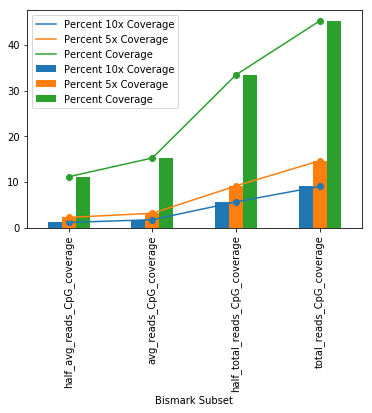

In [7]:
# Sort data
coverage_dataframe = coverage_dataframe.sort_values(by=['Percent Coverage'])


exclude = ['Mean Coverage']
coverage_dataframe = coverage_dataframe.loc[:, coverage_dataframe.columns.difference(exclude)] # Don't plot Mean Coverage
ax = coverage_dataframe.plot(x='Bismark Subset',marker='o') # Line plot with marker points.
coverage_dataframe.plot(kind='bar', x='Bismark Subset', ax=ax) # Overlays bar chart using axes defined in line plot

# Save figure to file.
# "bbox_inches" argument needed to prevent x asis lables from getting cut off.
plt.savefig(output_plot, bbox_inches = "tight")